# Load the Dataset

In [171]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string


df = pd.read_csv("/kaggle/input/chatgpt-twitter-dataset/chatgpt1.csv")
data = pd.read_csv("/kaggle/input/chatgpt-twitter-dataset/chatgpt1.csv")

**cleaning the dataset**

In [139]:
df.info()
df.columns
columns_to_drop = ['Tweet Id', 'Permalink', 'Outlinks', 'CountLinks', 'ConversationId', 'Source', 'Media', 'QuotedTweet']
df.drop(columns=columns_to_drop, inplace=True)
df['Datetime'] = pd.to_datetime(df['Datetime']
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        50001 non-null  object
 1   Tweet Id        50001 non-null  int64 
 2   Text            50001 non-null  object
 3   Username        50001 non-null  object
 4   Permalink       50001 non-null  object
 5   User            50001 non-null  object
 6   Outlinks        19942 non-null  object
 7   CountLinks      19942 non-null  object
 8   ReplyCount      50001 non-null  int64 
 9   RetweetCount    50001 non-null  int64 
 10  LikeCount       50001 non-null  int64 
 11  QuoteCount      50001 non-null  int64 
 12  ConversationId  50001 non-null  int64 
 13  Language        50001 non-null  object
 14  Source          50001 non-null  object
 15  Media           9502 non-null   object
 16  QuotedTweet     3563 non-null   object
 17  MentionedUsers  17169 non-null  object
 18  hashta

In [142]:

df['Text'] = df['Text'].str.replace(r'http\S+|www.\S+|@\S+', '', regex=True)
df['Text'] = df['Text'].str.replace('[^a-zA-Z]', ' ')
df['Text'] = df['Text'].str.lower()


/tmp/ipykernel_34/629731186.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^a-zA-Z]', ' ')


# Spliting The Dataset

In [146]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# train_df will contain 80% of the data for training
# test_df will contain 20% of the data for testing


In [155]:
X_train = train['Text']
y_train = train['Language']
X_test = test['Text']
y_test = test['Language']


**Vectorize the text data**

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [153]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [156]:
from sklearn.svm import SVC

# Create an instance of the SVM classifier
svm = SVC()

# Train the classifier on the training data
svm.fit(X_train_tfidf, y_train)
# Transform the testing data using the same TF-IDF vectorizer
X_test_tfidf = tfidf.transform(X_test)

# Make predictions on the testing data
y_pred = svm.predict(X_test_tfidf)


**K mean clustering**

In [158]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.8998252766453116
Classification Report:
               precision    recall  f1-score   support

          ar       1.00      0.05      0.10        20
          ca       0.00      0.00      0.00         6
          cs       0.00      0.00      0.00         5
          cy       0.00      0.00      0.00         2
          da       0.00      0.00      0.00         8
          de       0.99      0.91      0.95       109
          en       0.92      0.98      0.95      2466
          es       0.96      0.90      0.93       182
          et       0.00      0.00      0.00         2
          fa       0.00      0.00      0.00         7
          fi       0.00      0.00      0.00         2
          fr       0.97      0.92      0.94       192
          hi       0.00      0.00      0.00         5
          ht       0.00      0.00      0.00         1
          hu       0.00      0.00      0.00         1
          in       0.00      0.00      0.00        19
          it       0.97     

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Preprocess labels using LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Convert text features to TF-IDF vectors
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Create KMeans instance with desired number of clusters
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model on the training data
kmeans.fit(X_train_tfidf)

# Predict the cluster labels for the training and testing data
train_labels = kmeans.labels_
test_labels = kmeans.predict(X_test_tfidf)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [160]:
# Perform evaluation of clustering results (optional)
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Evaluate clustering performance using adjusted Rand index
rand_index = adjusted_rand_score(y_train_encoded, train_labels)
print("Adjusted Rand Index:", rand_index)

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X_train_tfidf, train_labels)
print("Silhouette Score:", silhouette_avg)


Adjusted Rand Index: 0.20383631015318301
Silhouette Score: 0.037929452810789965


**KneighourClassifier**

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Preprocess labels using LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Convert text features to TF-IDF vectors
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Create KNN classifier instance with desired number of neighbors
n_neighbors = 5  # Adjust the number of neighbors as needed
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Fit the classifier on the training data
knn.fit(X_train_tfidf, y_train_encoded)

# Predict the labels for the testing data
y_pred = knn.predict(X_test_tfidf)

# Convert the predicted labels back to original text labels
y_pred_text = le.inverse_transform(y_pred)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_text)
print("Accuracy:", accuracy)


Accuracy: 0.14764123471170645


In [166]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("/kaggle/input/chatgpt-twitter-dataset/chatgpt1.csv")

# Preprocessing steps
columns_to_drop = ['Tweet Id', 'Permalink', 'Outlinks', 'CountLinks', 'ConversationId', 'Source', 'Media', 'QuotedTweet']
df.drop(columns=columns_to_drop, inplace=True)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Text'] = df['Text'].str.replace(r'http\S+|www.\S+|@\S+', '', regex=True)
df['Text'] = df['Text'].str.replace('[^a-zA-Z]', ' ')
df['Text'] = df['Text'].str.lower()

# Feature selection and target variable
X = df['Text']
y = df['Retweet']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create KNN regression model with desired number of neighbors
n_neighbors = 5  # Adjust the number of neighbors as needed
knn = KNeighborsRegressor(n_neighbors=n_neighbors)

# Train the regression model
knn.fit(X_train_tfidf, y_train)

# Predict engagement levels for the test data
y_pred = knn.predict(X_test_tfidf)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


/tmp/ipykernel_34/3227112416.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^a-zA-Z]', ' ')


KeyError: 'Retweet'

**Sentiment Analysis**

Text(0.5, 1.0, 'Languages in the Posts')

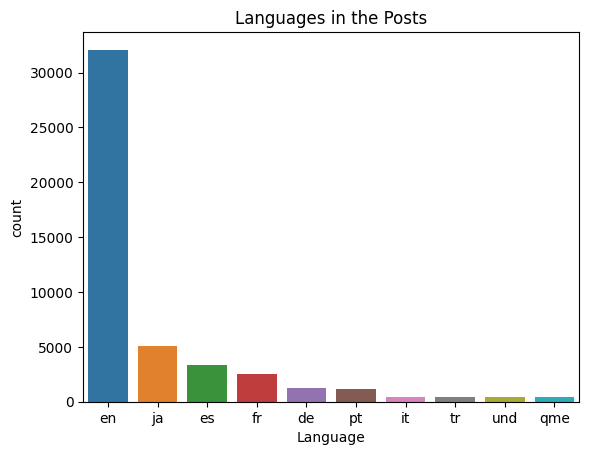

In [172]:
sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index[:10])
plt.title('Languages in the Posts')

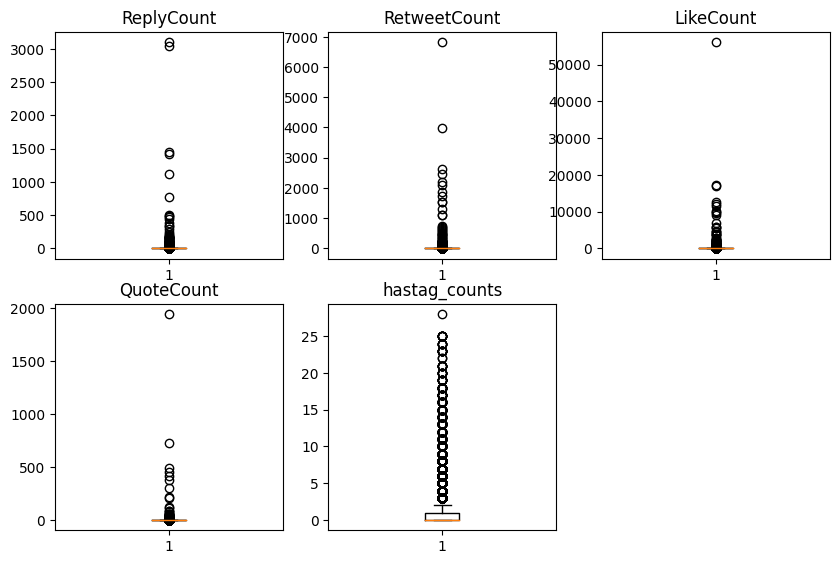

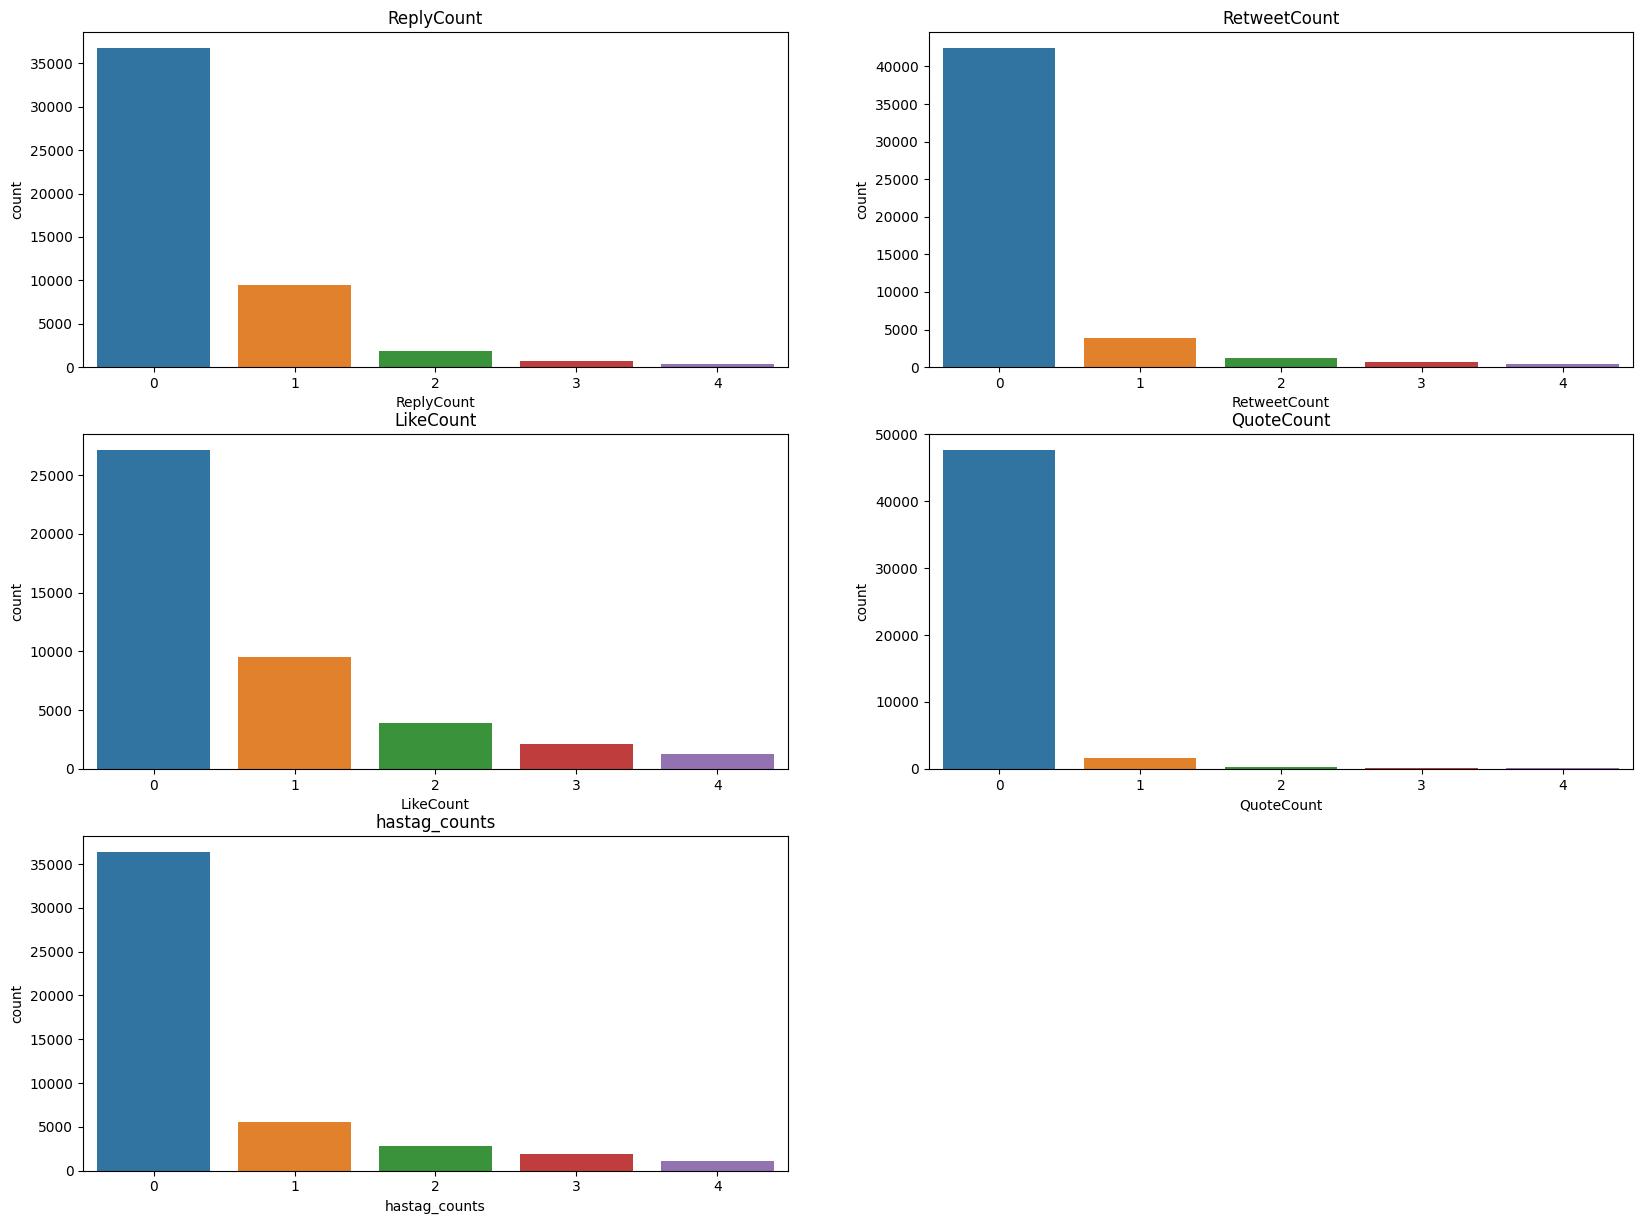

In [174]:
# Boxplots
fig = plt.figure(figsize = (10, 10))
features = ['ReplyCount',
            'RetweetCount',
            'LikeCount',
            'QuoteCount',
            'hastag_counts']
for i in range(len(features)):
    plt.subplot(3,3, i+1)
    plt.boxplot(df[features[i]])
    plt.title(features[i])
#CountPlot or Barcharts
fig = plt.figure(figsize = (20, 20))
for i in range(len(features)):
    plt.subplot(4,2, i+1)
    sns.countplot(data=df, x=features[i], order=df[features[i]].value_counts().index[:5])
    plt.title(features[i])

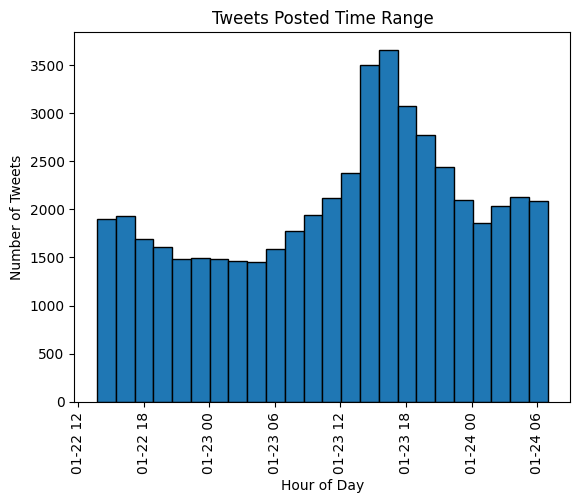

In [175]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

plt.hist(df['Datetime'], bins=24, edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.title('Tweets Posted Time Range')
plt.xticks(rotation=90)

plt.show()

Text(0.5, 1.0, 'Reaction Counts')

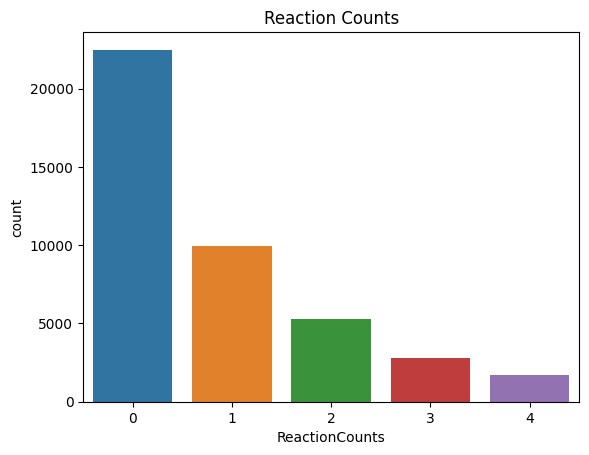

In [176]:
# Feature Engineering
df['ReactionCounts'] = df['ReplyCount'] + df['RetweetCount'] + df['LikeCount'] + df['QuoteCount']
sns.countplot(data=df, x='ReactionCounts', order=df['ReactionCounts'].value_counts().index[:5])
plt.title('Reaction Counts')

In [177]:
df_sorted = df.sort_values('ReactionCounts', ascending=False)
df_sorted[['Text', 'Username', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'ReactionCounts']].head(5)

,Text,Username,ReplyCount,RetweetCount,LikeCount,QuoteCount,ReactionCounts
399,ChatGPT passed a Wharton MBA exam. \n\nTime to...,GRDecter,1421,6815,56073,1947,66256
15356,子どもの練習用に基礎単語1000単語くらい網羅した瞬間英作文教材ほしいけど自作するの大変そう...,sashishi_EN,14,3987,17150,216,21367
11134,The fact that ChatGPT writes strange and medio...,mccormick_ted,68,1874,16856,81,18879
2855,Pretty absurd that chatGPT has passed the Unit...,noor_siddiqui_,496,2627,12557,726,16406
44851,ChatGPT has passed:\n\n- United States medical...,GRDecter,777,2082,12158,456,15473


In [178]:
pd.set_option('display.max_colwidth', None)
df_sorted['Text'].head()

399                                                                                                                                                                                                                             ChatGPT passed a Wharton MBA exam. \n\nTime to overhaul education.
15356                                                                                                                                                          子どもの練習用に基礎単語1000単語くらい網羅した瞬間英作文教材ほしいけど自作するの大変そうだなーどうしようかなーって考えてたけど、ChatGPTさんが一瞬で作ってくれることに気付いた。ほんと凄いねこのAI...。 https://t.co/ZEaf3WH5eQ
11134                                                                           The fact that ChatGPT writes strange and mediocre undergraduate humanities papers but fantastic elite MBA exams suggests it may not have the same implications for every kind of education https://t.co/6MiaepzCDU
2855     Pretty absurd that chatGPT has passed the United States Medical Licensing Examination (USMLE). \n\nToday, it takes 4 y